### Setting Up Environment
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
%matplotlib inline

### Initializing Data
___

In [3]:
data_raw = pd.read_csv('..\\Data\\2015_2016_PA_Salaries.csv', encoding='latin1')

In [4]:
# file_url = 'https://raw.githubusercontent.com/bernardkung/TeacherSalary/master/2015_2016_PA_Salaries.csv'
# data_raw = pd.read_csv(file_url, encoding='latin1')

In [5]:
data = data_raw
data.rename(columns=lambda x: x.replace(' ',''), inplace = True)

In [6]:
data['AnnualSalary'] = data_raw['AnnualSalary'].apply(lambda x: x.strip('$'))
data['AnnualSalary'] = data_raw['AnnualSalary'].apply(lambda x: x.replace(',',''))
data['AnnualSalary'] = data_raw['AnnualSalary'].astype(int)

In [7]:
data.head()

Name      SchoolDistrict                   JobCategory  \
0             HAIN, JOEL K  South Middleton SD  Administrative / Supervisory   
1          APPLE, EDWARD E   Juniata County SD  Administrative / Supervisory   
2          RUMMEL, JAMES S        Armstrong SD  Administrative / Supervisory   
3             STAGE, CRAIG      Athens Area SD  Administrative / Supervisory   
4  KEPLER, BERNARD CHARLES     Palmyra Area SD  Administrative / Supervisory   

                     Position                Assignment  YearsInLEA  \
0        School Administrator       Secondary Principal           3   
1        School Administrator       Secondary Principal          21   
2        School Administrator       Secondary Principal          13   
3  Chief School Administrator     Acting Superintendent           3   
4           LEA Administrator  Assistant Superintendent           2   

   YearsInEd    HighestDegree  AnnualSalary  
0         16  Master's degree        107424  
1         21  Master's degree         94181  
2         25  Master's degree        104207  
3         14  Master's degree        130000  
4         18  Doctoral degree        130907

### The Times They Are A Changin'
___

In Part 1, I focused primarily on the School District variable to examine differences in the annual salaries of administrators versus teachers. Here in Part 2, I want to turn my focus to the only two continuous variables:

* YearsInLEA, or Years in Local Education Agency, is synonymous with years in school district. 
* YearsInEd, or Years in Education, is exactly as it sounds and represents overall years working in education.

In [8]:
year_data = data[['YearsInLEA','YearsInEd','JobCategory','AnnualSalary']]

In [9]:
year_data.describe()

YearsInLEA      YearsInEd   AnnualSalary
count  146744.000000  146744.000000  146744.000000
mean       11.780448      13.521411   67405.910116
std         8.040157       8.572739   20353.632473
min         1.000000       1.000000      39.000000
25%         6.000000       7.000000   52257.750000
50%        11.000000      12.000000   64527.000000
75%        17.000000      19.000000   79282.000000
max        60.000000      66.000000  304523.000000

[Text(0.5,1,'Distribution of Years in School District')]

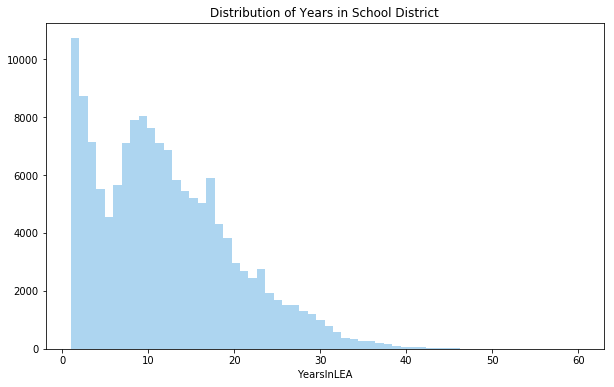

In [10]:
dims = (10, 6)
fig22, ax22 = plt.subplots(figsize=dims)
sns.distplot(data['YearsInLEA'],kde=False,bins=60,ax=ax22, color='#3498db')
ax22.set(title="Distribution of Years in School District")

[Text(0.5,1,'Distribution of Years in Education')]

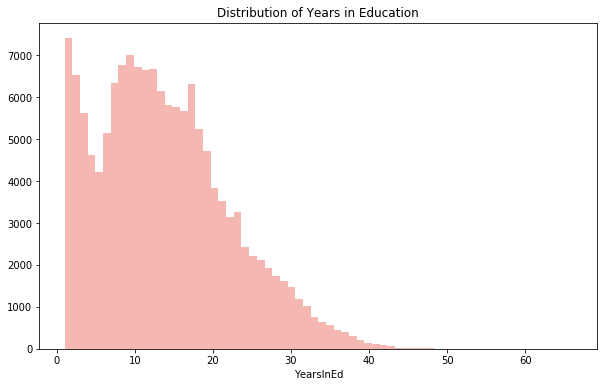

In [11]:
dims = (10, 6)
fig23, ax23 = plt.subplots(figsize=dims)
sns.distplot(data['YearsInEd'],kde=False,bins=66,ax=ax23, color='#e74c3c')
ax23.set(title="Distribution of Years in Education")

I'll start with graphing the distributions of the plots. Since I know the maximum value of each year column, I'll use it to set my bins so that the bars are divided by year. 

The first really remarkable note here is that there's an unusual dip in both graphs at 5 years. This could be due to unusually low numbers of teachers hired 5 years ago, or unusually high attrition in the last couple years as teachers approach 5 years. Alternatively, albeit less likely, there was an unusually high number of teachers that entered the workforce 10 years ago. Probably there's a combination of both effects, but strongly favoring the former effect. 

A less obvious note here is that just looking at first bar of both graphs, corresponding to first year teachers in their school district and education respectively, it appears that more teachers are in their first year at their current LEA than in their first year of education. The idea here being that teachers are switching between districts. Likely will want to check to make sure no teacher has more years in LEA than years in education. 

Text(0.5,1.05,'Comparing Annual Salary to Years of Experience')

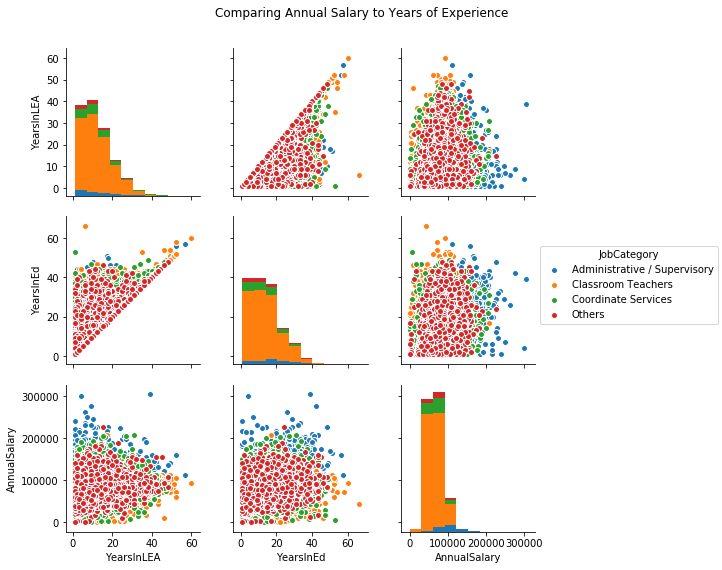

In [12]:
fig21 = sns.pairplot(year_data, hue='JobCategory')
plt.suptitle("Comparing Annual Salary to Years of Experience",y=1.05)

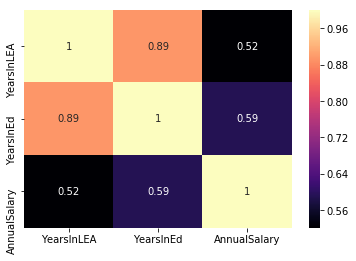

In [13]:
sns.heatmap(year_data.corr(),cmap='magma',annot=True)

Starting with a scatterplot matrix. 
On the diagonals are histograms; here the dip at the 5 year mark is smoothed out by the fewer number of bins. 
In The YearsInEd to YearsInLEA plot, there are no points above the diagonal, which is exactly the way it should be. Points on the diagonal have only ever worked in that school district, while points below are teachers who have switched school districts at least once.
Finally, in the two plots of Annual Salary vs YearsInEd and YearsInLEA respectively, there's a lot of data and it doesn't show any meaningful shape. That's actually what's interesting about these plots; YearsInEd and YearsInLEA can be thought of as variables measuring experience, with pay increasing over time/experience. This should correspond to a scatter plot with points distributed on the increasing diagonal. So either there's too much density to see this, or there's no correlation.

The corrrelation plot below.
YearsInEd and YearsInLEA have a strong correlation; seems to indicate that people don't job hop, at least between school districts. 
Annual Salary doesn't seem to be strongly correlated with either YearsInEd or YearsInLEA. This again, supporting what was seen above in the scatter plots.

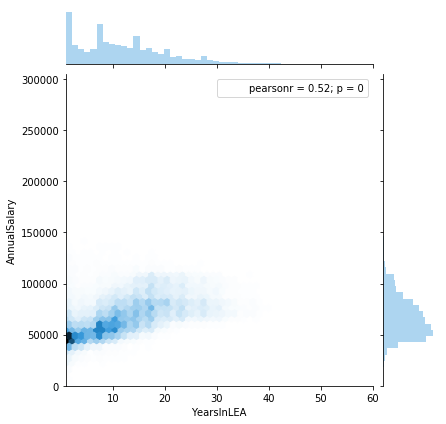

In [34]:
#“scatter” | “reg” | “resid” | “kde” | “hex” 
sns.jointplot("YearsInLEA","AnnualSalary", data= data, kind= 'hex', color='#3498db')

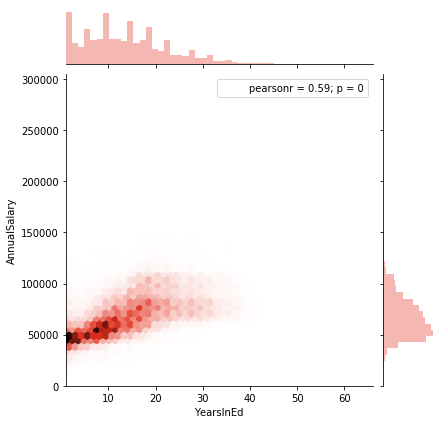

In [33]:
sns.jointplot("YearsInEd","AnnualSalary", data= data, kind= 'hex', color='#e74c3c')

Generate a school district age variable?

In [35]:
summ_year_data = data['']

YearsInLEA  YearsInEd                   JobCategory  AnnualSalary
0           3         16  Administrative / Supervisory        107424
1          21         21  Administrative / Supervisory         94181
2          13         25  Administrative / Supervisory        104207
3           3         14  Administrative / Supervisory        130000
4           2         18  Administrative / Supervisory        130907

In [45]:
year_data.head()

YearsInLEA  YearsInEd                   JobCategory
0           3         16  Administrative / Supervisory
1          21         21  Administrative / Supervisory
2          13         25  Administrative / Supervisory
3           3         14  Administrative / Supervisory
4           2         18  Administrative / Supervisory

In [41]:
year_data_tall = pd.DataFrame(year_data.stack())

In [ ]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

NameError: name 'ax' is not defined

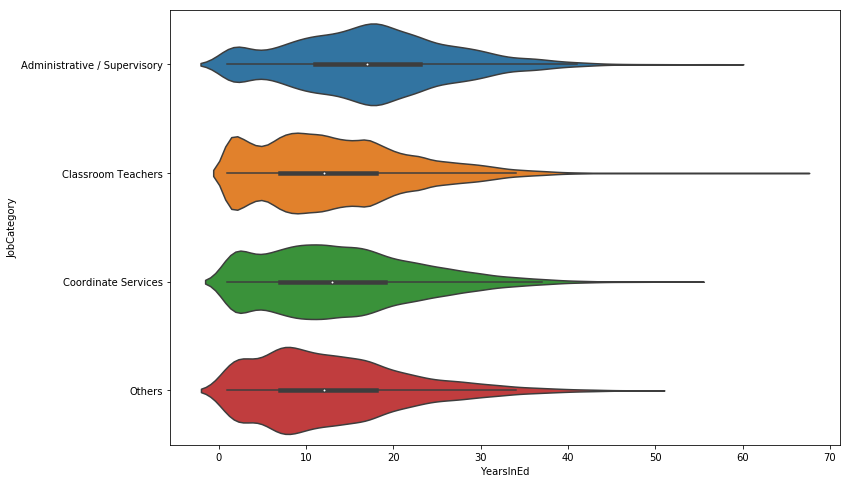

In [21]:
dims = (12, 8)
fig22, ax22 = plt.subplots(figsize=dims)
sns.violinplot(x='YearsInEd', y='JobCategory', data=data, ax=ax22)
ax.set(title = 'Distribution of Years in Education')

NameError: name 'ax' is not defined

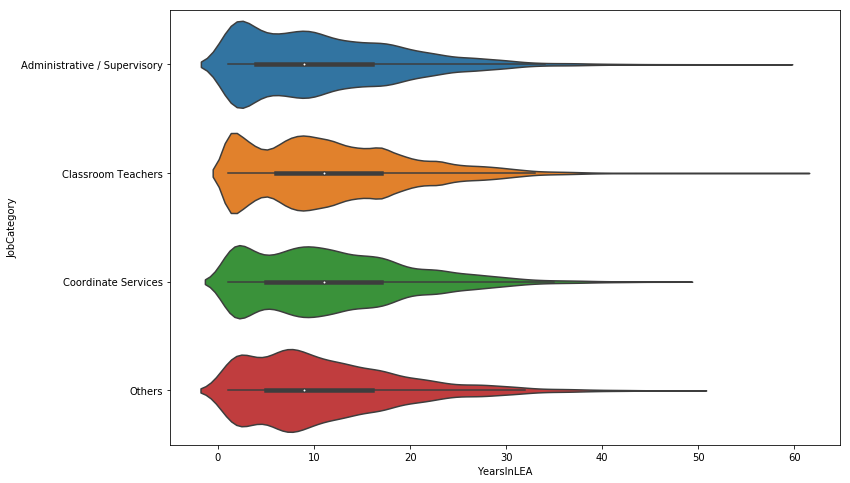

In [22]:
dims = (12, 8)
fig22, ax22 = plt.subplots(figsize=dims)
sns.violinplot(x='YearsInLEA', y='JobCategory', data=data, ax=ax22)
ax.set(title = 'Distribution of Years in District')

### Initializing Aggregate DataFrames
___

In [16]:
district_category_data = data.groupby(['SchoolDistrict','JobCategory']).mean()

In [17]:
district_category_data['TotalSalary'] = data.groupby(['SchoolDistrict','JobCategory']).sum()['AnnualSalary']

In [18]:
district_category_data['TotalPersons'] = data.groupby(['SchoolDistrict','JobCategory']).count()['Name']

In [19]:
district_category_data.columns = ['AvgYearsInLEA','AvgYearsInEd','AvgAnnualSalary','SumSalaries','SumPersons']

In [20]:
district_category_data.head()

AvgYearsInLEA  \
SchoolDistrict        JobCategory                                   
-                     Administrative / Supervisory       2.038462   
                      Classroom Teachers                 1.900524   
                      Coordinate Services                1.500000   
                      Others                             1.846154   
21st Century Cyber CS Administrative / Supervisory       4.333333   

                                                    AvgYearsInEd  \
SchoolDistrict        JobCategory                                  
-                     Administrative / Supervisory     11.192308   
                      Classroom Teachers                4.188482   
                      Coordinate Services               5.583333   
                      Others                           11.230769   
21st Century Cyber CS Administrative / Supervisory     14.666667   

                                                    AvgAnnualSalary  \
SchoolDistrict        JobCategory                                     
-                     Administrative / Supervisory     80109.653846   
                      Classroom Teachers               45629.591623   
                      Coordinate Services              55764.583333   
                      Others                           41646.153846   
21st Century Cyber CS Administrative / Supervisory    104567.000000   

                                                    SumSalaries  SumPersons  
SchoolDistrict        JobCategory                                            
-                     Administrative / Supervisory      2082851          26  
                      Classroom Teachers                8715252         191  
                      Coordinate Services                669175          12  
                      Others                             541400          13  
21st Century Cyber CS Administrative / Supervisory       313701           3

In [21]:
district_data = district_category_data.unstack()

In [22]:
district_data['TotalAnnualSalary'] = district_data['AvgAnnualSalary'].sum(axis=1)
district_data['TotalPersons'] = district_data['SumPersons'].sum(axis=1)

In [23]:
district_data.head()

AvgYearsInLEA                     \
JobCategory               Administrative / Supervisory Classroom Teachers   
SchoolDistrict                                                              
-                                             2.038462           1.900524   
21st Century Cyber CS                         4.333333           4.973684   
A W Beattie Career Center                    11.333333          12.034483   
ACT Academy Cyber CS                          1.000000           1.125000   
ARIN IU 28                                   11.875000          11.825000   

                                                          \
JobCategory               Coordinate Services     Others   
SchoolDistrict                                             
-                                    1.500000   1.846154   
21st Century Cyber CS                5.000000   6.000000   
A W Beattie Career Center            4.500000  11.500000   
ACT Academy Cyber CS                 1.000000        NaN   
ARIN IU 28                          13.222222  20.333333   

                                          AvgYearsInEd                     \
JobCategory               Administrative / Supervisory Classroom Teachers   
SchoolDistrict                                                              
-                                            11.192308           4.188482   
21st Century Cyber CS                        14.666667           7.263158   
A W Beattie Career Center                    14.000000          13.793103   
ACT Academy Cyber CS                         11.000000           9.500000   
ARIN IU 28                                   15.375000          13.175000   

                                                          \
JobCategory               Coordinate Services     Others   
SchoolDistrict                                             
-                                    5.583333  11.230769   
21st Century Cyber CS                7.400000   9.666667   
A W Beattie Career Center           17.500000  12.333333   
ACT Academy Cyber CS                 2.000000        NaN   
ARIN IU 28                          15.555556  20.666667   

                                       AvgAnnualSalary                     \
JobCategory               Administrative / Supervisory Classroom Teachers   
SchoolDistrict                                                              
-                                         80109.653846       45629.591623   
21st Century Cyber CS                    104567.000000       58499.605263   
A W Beattie Career Center                 88516.666667       60988.655172   
ACT Academy Cyber CS                      89000.000000       45460.500000   
ARIN IU 28                                92491.000000       66702.575000   

                              ...                       SumSalaries  \
JobCategory                   ...      Administrative / Supervisory   
SchoolDistrict                ...                                     
-                             ...                         2082851.0   
21st Century Cyber CS         ...                          313701.0   
A W Beattie Career Center     ...                          265550.0   
ACT Academy Cyber CS          ...                          178000.0   
ARIN IU 28                    ...                          739928.0   

                                                                            \
JobCategory               Classroom Teachers Coordinate Services    Others   
SchoolDistrict                                                               
-                                  8715252.0            669175.0  541400.0   
21st Century Cyber CS              2222985.0            325919.0  268700.0   
A W Beattie Career Center          1768671.0            140756.0  378989.0   
ACT Academy Cyber CS                363684.0             45000.0       NaN   
ARIN IU 28                         2668103.0           1370081.0  257862.0   

                                  

In [24]:
salary_data = pd.DataFrame(data = {'sums': district_data[('AvgAnnualSalary','Administrative / Supervisory')]+district_data[('AvgAnnualSalary','Classroom Teachers')],
                                   'administrators': district_data[('AvgAnnualSalary','Administrative / Supervisory')],
                                   'teachers': district_data[('AvgAnnualSalary','Classroom Teachers')],
                                   'size': district_data[('TotalPersons')],
                                   'budget': district_data[('TotalAnnualSalary')]}
                        ).sort_values(by=['sums','teachers'],ascending=False)

In [25]:
salary_data.head()

administrators         budget   size  \
SchoolDistrict                                                               
Ridley SD                              147903.266667  455537.064111  444.0   
Lower Merion SD                        136593.638889  439765.289907  805.0   
Central Montco Technical High School   135697.000000  393172.761905   29.0   
New Hope-Solebury SD                   144960.500000  422351.138622  159.0   
Wissahickon SD                         138564.058824  420750.587352  391.0   

                                               sums      teachers  
SchoolDistrict                                                     
Ridley SD                             232154.213047  84250.946381  
Lower Merion SD                       230954.498645  94360.859756  
Central Montco Technical High School  230932.095238  95235.095238  
New Hope-Solebury SD                  230011.045455  85050.545455  
Wissahickon SD                        228630.263028  90066.204204